# DSO 530 - Group Project

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import randint, uniform

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, RocCurveDisplay
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
from sklearn.model_selection import validation_curve
from sklearn.impute import SimpleImputer
from sklearn.ensemble import IsolationForest
from sklearn.svm import SVR, SVC
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBRegressor, XGBClassifier
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.ensemble import GradientBoostingRegressor, GradientBoostingClassifier
from sklearn.ensemble import StackingRegressor, StackingClassifier
from sklearn.pipeline import make_pipeline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd '/content/drive/MyDrive/SP24/DSO 530 Group Project'

/content/drive/MyDrive/SP24/DSO 530 Group Project


In [ ]:
# Import Files
df_train = pd.read_csv('option_train.csv', usecols=[1,2,3,4,5,6])
df_test = pd.read_csv('option_test_nolabel.csv', usecols=[1,2,3,4])

In [ ]:
df_train.head(10)

,Value,S,K,tau,r,BS
0,348.500,1394.46,1050,0.128767,0.0116,Under
1,149.375,1432.25,1400,0.679452,0.0113,Under
2,294.500,1478.90,1225,0.443836,0.0112,Under
3,3.375,1369.89,1500,0.117808,0.0119,Over
4,84.000,1366.42,1350,0.298630,0.0119,Under
5,163.000,1416.83,1275,0.178082,0.0114,Under
6,24.500,1445.57,1500,0.158904,0.0112,Over
7,210.500,1467.17,1275,0.180822,0.0111,Under
8,170.250,1464.92,1300,0.139726,0.0111,Over
9,164.000,1348.05,1300,0.800000,0.0120,Under


In [ ]:
df_test.head(10)

,S,K,tau,r
0,1409.28,1325,0.126027,0.0115
1,1505.97,1100,0.315068,0.0110
2,1409.57,1450,0.197260,0.0116
3,1407.81,1250,0.101370,0.0116
4,1494.50,1300,0.194521,0.0110
5,1436.23,1175,0.205479,0.0114
6,1477.26,1525,0.213699,0.0110
7,1475.95,1250,0.241096,0.0111
8,1407.81,1125,0.101370,0.0116
9,1434.32,1425,0.449315,0.0114


## Data Exploration

#### Checking distribution of each variable

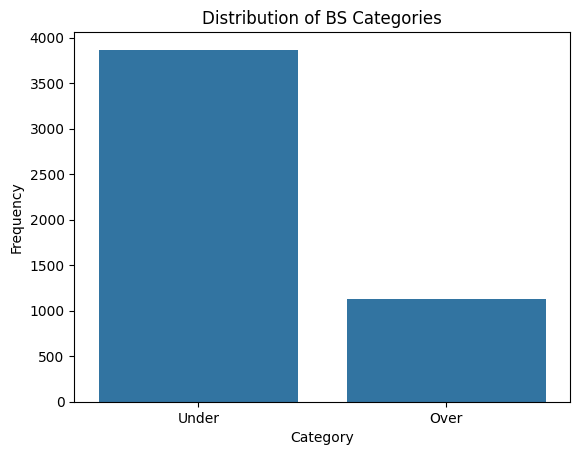

In [ ]:
# Distribution of BS
sns.countplot(x='BS', data=df_train)

plt.title('Distribution of BS Categories')
plt.xlabel('Category')
plt.ylabel('Frequency')
plt.show()

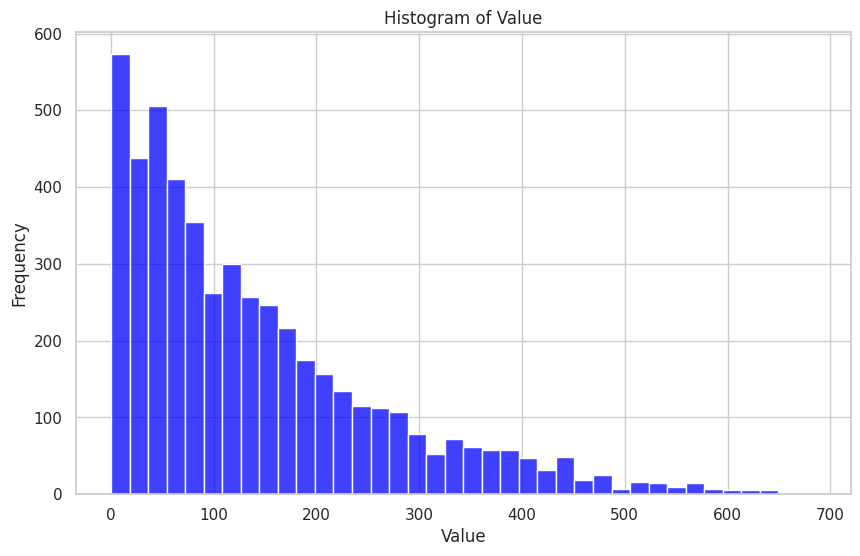

In [ ]:
# Distribution of Value
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.histplot(df_train['Value'], kde=False, color='blue')
plt.title('Histogram of Value')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

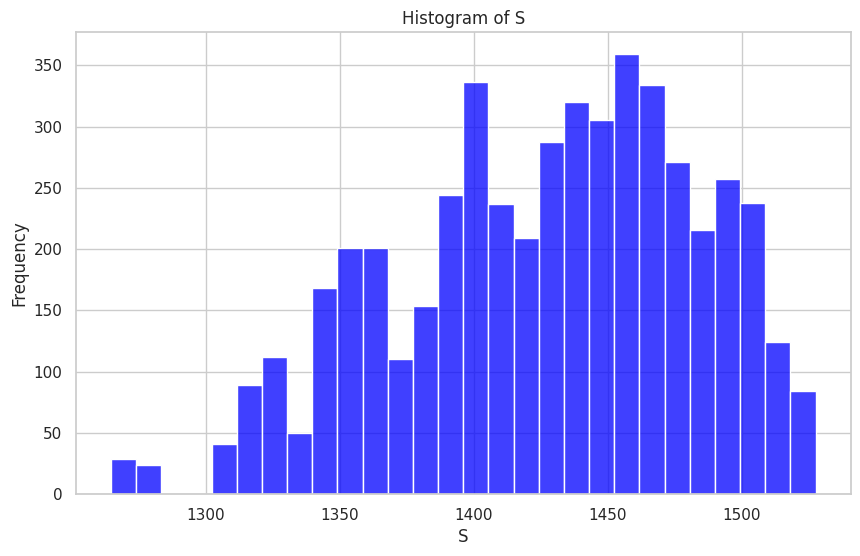

In [ ]:
# Distribution of S
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.histplot(df_train['S'], kde=False, color='blue')
plt.title('Histogram of S')
plt.xlabel('S')
plt.ylabel('Frequency')
plt.show()

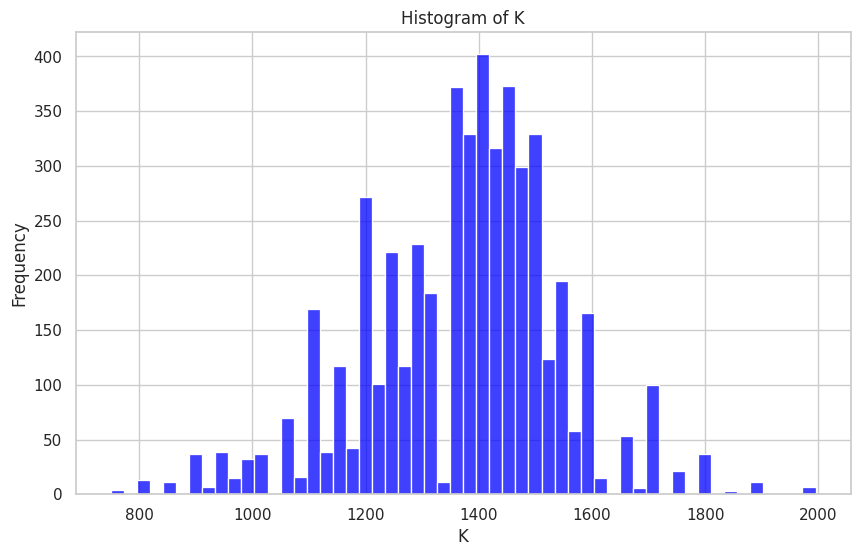

In [ ]:
# Distribution of K
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.histplot(df_train['K'], kde=False, color='blue')
plt.title('Histogram of K')
plt.xlabel('K')
plt.ylabel('Frequency')
plt.show()

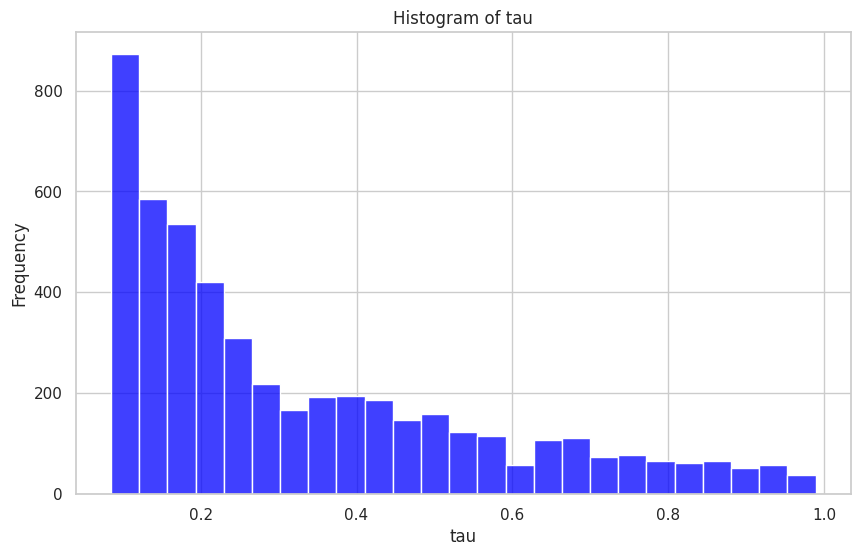

In [ ]:
# Distribution of tau
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.histplot(df_train['tau'], kde=False, color='blue')
plt.title('Histogram of tau')
plt.xlabel('tau')
plt.ylabel('Frequency')
plt.show()

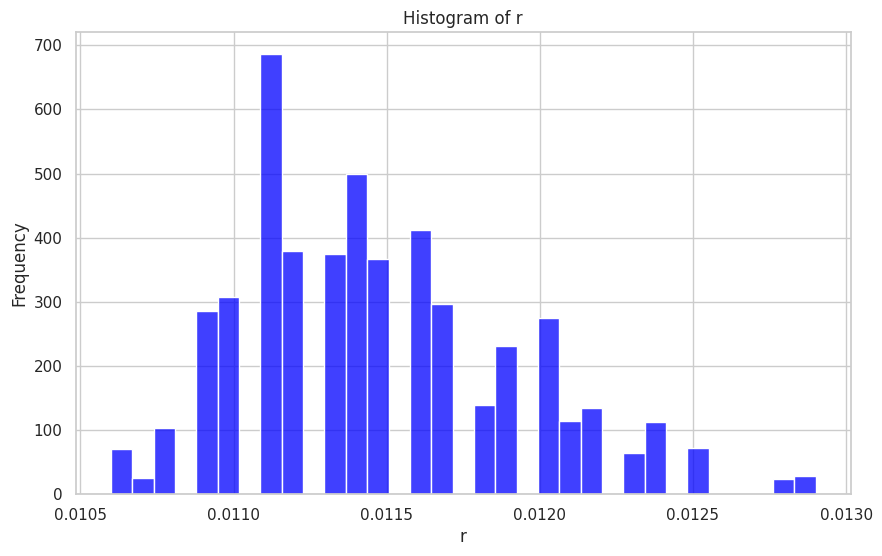

In [ ]:
# Distribution of r
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.histplot(df_train['r'], kde=False, color='blue')
plt.title('Histogram of r')
plt.xlabel('r')
plt.ylabel('Frequency')
plt.show()

In [ ]:
# Check for correlation between features
numerical_features = df_train.select_dtypes(include='number')
correlation_matrix = numerical_features.corr()

# Print correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

Correlation Matrix:
          Value         S         K       tau         r
Value  1.000000  0.148884 -0.880802  0.255343 -0.163317
S      0.148884  1.000000  0.128228 -0.020299 -0.983740
K     -0.880802  0.128228  1.000000  0.022948 -0.111107
tau    0.255343 -0.020299  0.022948  1.000000  0.010245
r     -0.163317 -0.983740 -0.111107  0.010245  1.000000


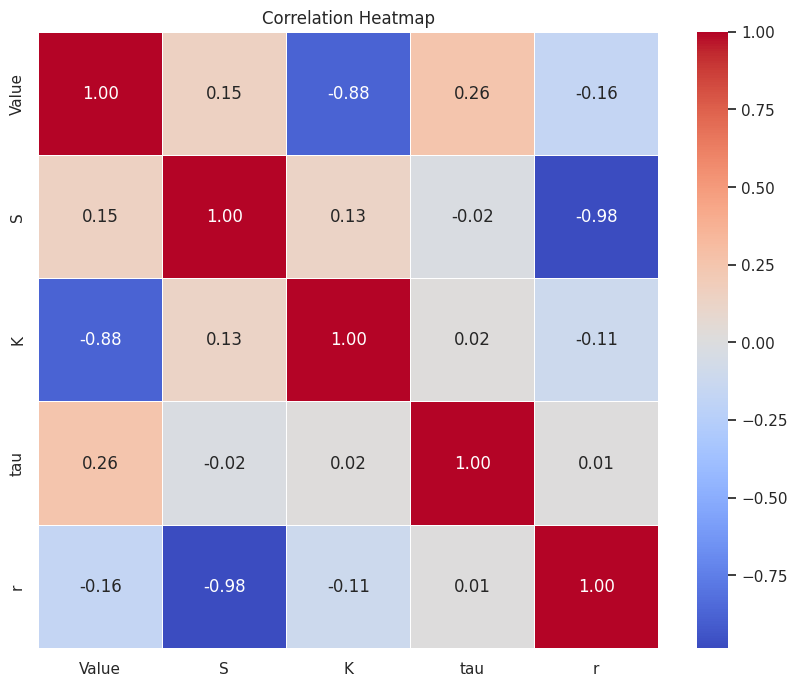

In [ ]:
# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

## Data Cleaning

#### Check for nulls

In [ ]:
print("Train Dataset:")
print(df_train.head())
print("\nTest Dataset (No Labels):")
print(df_test.head())

print("\nMissing values in Training Dataset:")
print(df_train.isnull().sum())
print("\nMissing values in Test Dataset:")
print(df_test.isnull().sum())

print("\nDescriptive Statistics for Training Dataset:")
print(df_train.describe())

Train Dataset:
     Value        S     K       tau       r     BS
0  348.500  1394.46  1050  0.128767  0.0116  Under
1  149.375  1432.25  1400  0.679452  0.0113  Under
2  294.500  1478.90  1225  0.443836  0.0112  Under
3    3.375  1369.89  1500  0.117808  0.0119   Over
4   84.000  1366.42  1350  0.298630  0.0119  Under

Test Dataset (No Labels):
         S     K       tau       r
0  1409.28  1325  0.126027  0.0115
1  1505.97  1100  0.315068  0.0110
2  1409.57  1450  0.197260  0.0116
3  1407.81  1250  0.101370  0.0116
4  1494.50  1300  0.194521  0.0110

Missing values in Training Dataset:
Value    0
S        0
K        0
tau      0
r        0
BS       0
dtype: int64

Missing values in Test Dataset:
S      0
K      0
tau    0
r      0
dtype: int64

Descriptive Statistics for Training Dataset:
             Value            S            K          tau            r
count  5000.000000  5000.000000  5000.000000  5000.000000  5000.000000
mean    140.316869  1426.643916  1370.244000     0.32761

In [ ]:
# Handling missing values
df_train.replace('', np.nan, inplace=True)
df_test.replace('', np.nan, inplace=True)

## Split into Train and Validation Sets

In [ ]:
X = df_train[['S', 'K', 'tau', 'r']]
y_value = df_train['Value']
y_bs = df_train['BS'].apply(lambda x: 1 if x == 'Over' else 0)
X_test = df_test[['S', 'K', 'tau', 'r']]

In [ ]:
# Split data into training and validation sets for both tasks
X_train, X_val, y_train_value, y_val_value = train_test_split(X, y_value, test_size=0.2, random_state=42)
X_train, X_val, y_train_bs, y_val_bs = train_test_split(X, y_bs, test_size=0.2, random_state=42)

In [ ]:
scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

In [ ]:
def inverse_log_target(scaler, y_scaled):
    # Inverse logarithmic transformation
    y_original = np.expm1(y_log_scale)
    return y_original.ravel()

## Models: Linear Regression

### Prediction

In [ ]:
# Initialize the Linear Regression model
linear_reg = LinearRegression()
linear_reg.fit(X_train_scaled, y_train_value_scaled)

LinearRegression()

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred_scaled = linear_reg.predict(X_val_scaled)

In [ ]:
mse = mean_squared_error(y_val_value, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_val_value, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R^2 Score: {r2}")


Mean Squared Error (MSE): 70252.54640407165
Root Mean Squared Error (RMSE): 265.0519692514501
R^2 Score: -3.3993547728678664


In [ ]:
X_train_scaled

array([[-1.34872663, -0.83724671,  0.04757416,  1.4115313 ],
       [ 0.98196218,  0.75304784, -0.29555851, -0.81380577],
       [ 0.00996529, -0.25895778, -1.05281682, -0.14620465],
       ...,
       [-0.21057033, -1.27096341, -0.88716656,  0.07632906],
       [ 0.33265684, -0.69267448,  2.4968315 , -0.59127206],
       [-1.40595535, -1.27096341, -0.11807609,  1.1889976 ]])

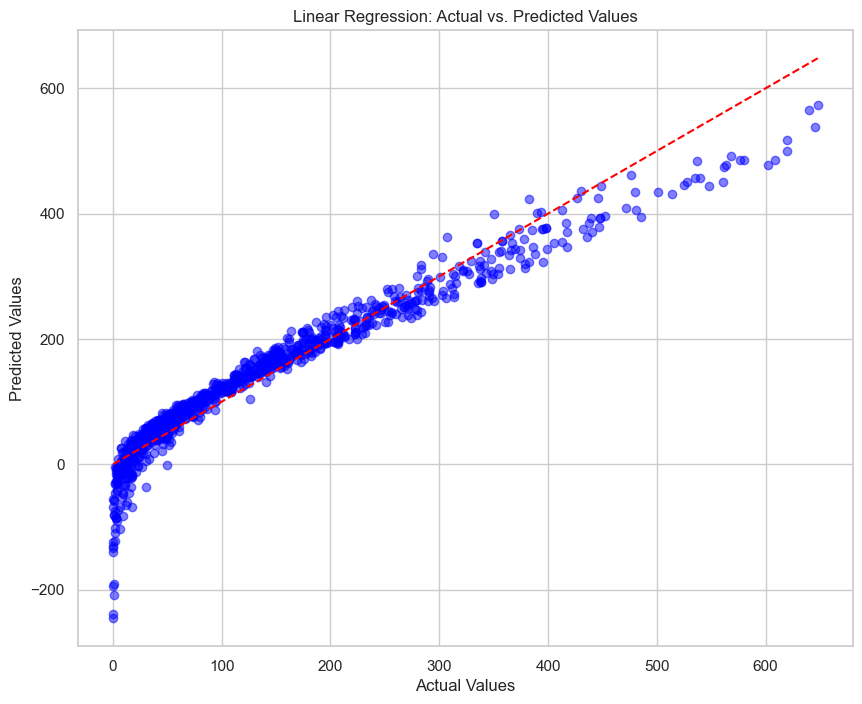

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
plt.scatter(y_val_value, y_pred, color='blue', alpha=0.5)
plt.plot([min(y_val_value), max(y_val_value)], [min(y_val_value), max(y_val_value)], color='red', linestyle='--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Linear Regression: Actual vs. Predicted Values')
plt.show()

#### Feature Importance

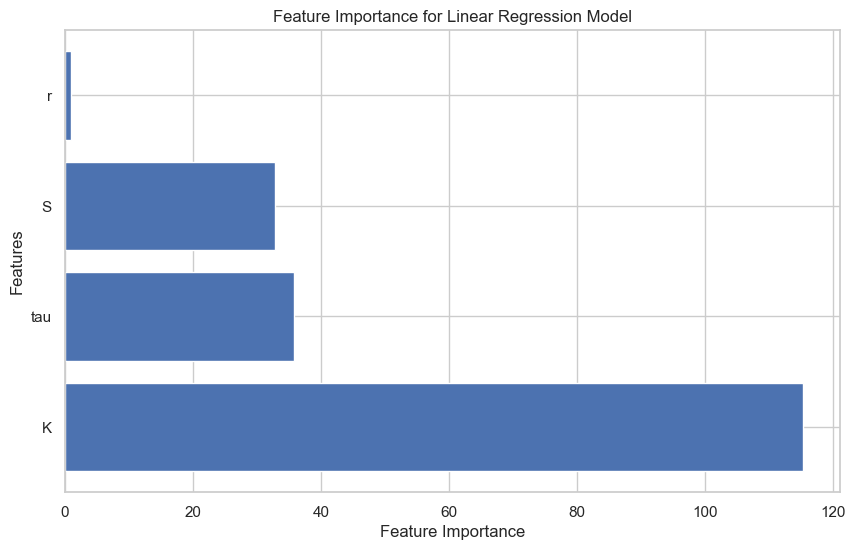

In [ ]:
feature_names = X_train.columns
feature_importance = np.abs(linear_reg.coef_)
indices = np.argsort(feature_importance)[::-1]
names = [feature_names[i] for i in indices]

plt.figure(figsize=(10, 6))
plt.barh(range(X_train_scaled.shape[1]), feature_importance[indices], align='center')
plt.yticks(range(X_train_scaled.shape[1]), names)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance for Linear Regression Model')
plt.show()

### Models: Logsitic Regression

In [ ]:
logistic_reg = LogisticRegression()

logistic_reg.fit(X_train_scaled, y_train_bs)
y_pred_bs = logistic_reg.predict(X_val_scaled)

accuracy = accuracy_score(y_val_bs, y_pred_bs)
print(f"Accuracy: {accuracy * 100}%")

conf_matrix = confusion_matrix(y_val_bs, y_pred_bs)
print("Confusion Matrix:")
print(conf_matrix)

print("Classification Report:")
print(classification_report(y_val_bs, y_pred_bs))

Accuracy: 88.6%
Confusion Matrix:
[[714  42]
 [ 72 172]]
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.94      0.93       756
           1       0.80      0.70      0.75       244

    accuracy                           0.89      1000
   macro avg       0.86      0.82      0.84      1000
weighted avg       0.88      0.89      0.88      1000



In [ ]:
misclassifications = np.sum(y_pred_bs != y_val_bs)
total_predictions = len(y_val_bs)
error_rate = misclassifications / total_predictions

# Print the error rate
print(f"Error Rate: {error_rate * 100}%")

Error Rate: 11.4%


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


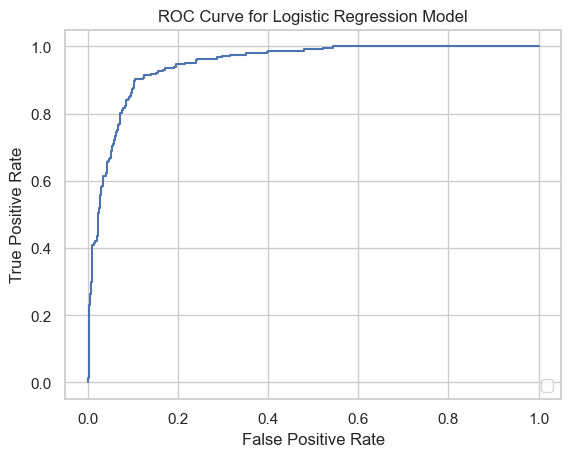

In [ ]:
from sklearn.metrics import roc_curve, RocCurveDisplay

y_prob = logistic_reg.predict_proba(X_val_scaled)[:, 1]
fpr, tpr, thresholds = roc_curve(y_val_bs, y_prob)

# Plot ROC curve
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr)
roc_display.plot()
plt.title('ROC Curve for Logistic Regression Model')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()


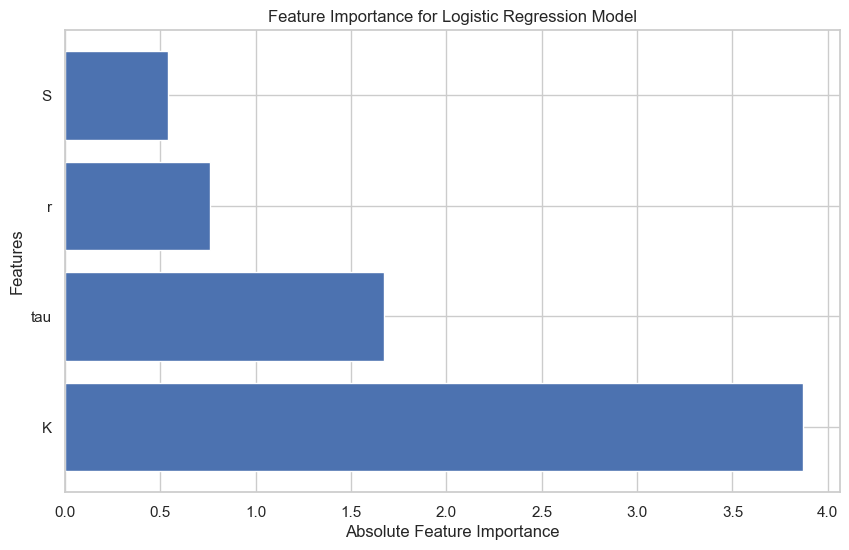

In [ ]:
feature_importance = logistic_reg.coef_[0]


abs_feature_importance = np.abs(feature_importance)
indices = np.argsort(abs_feature_importance)[::-1]
names = [X_train.columns[i] for i in indices]

plt.figure(figsize=(10, 6))
plt.barh(range(X_train.shape[1]), abs_feature_importance[indices], align='center')
plt.yticks(range(X_train.shape[1]), names)
plt.xlabel('Absolute Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance for Logistic Regression Model')
plt.show()

## Models: XGBoost

In [ ]:
scaler
xgb_reg = XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.1, max_depth=5)
xgb_reg.fit(X_train_scaled, y_train_value)
y_pred_value = xgb_reg.predict(X_val_scaled)

rmse = mean_squared_error(y_val_value, y_pred_value, squared=False)
r_squared = r2_score(y_val_value, y_pred_value)
print(f"RMSE for Regression Model: {rmse}")
print(f"R-squared for Regression Model: {r_squared * 100}")

cv_rmse_scores = cross_val_score(xgb_reg, X_train_scaled, y_train_value, cv=5, scoring='neg_root_mean_squared_error')
cv_r2_scores = cross_val_score(xgb_reg, X_train_scaled, y_train_value, cv=5, scoring='r2')
print(f"Cross-Validation RMSE Scores: {-cv_rmse_scores.mean()}")
print(f"Cross-Validation R-squared Scores: {cv_r2_scores.mean() * 100}")


xgb_clf = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_clf.fit(X_train_scaled, y_train_bs)
y_pred_bs = xgb_clf.predict(X_val_scaled)

accuracy = accuracy_score(y_val_bs, y_pred_bs)
print(f"Accuracy for Classification Model: {accuracy * 100}")

cv_accuracy_scores = cross_val_score(xgb_clf, X_train_scaled, y_train_bs, cv=5, scoring='accuracy')
print(f"Cross-Validation Accuracy Scores: {cv_accuracy_scores.mean() * 100}")

RMSE for Regression Model: 6.853590481623963
R-squared for Regression Model: 99.70585381724145
Cross-Validation RMSE Scores: 7.218625018383622
Cross-Validation R-squared Scores: 99.66095451148098
Accuracy for Classification Model: 93.8
Cross-Validation Accuracy Scores: 93.35000000000001


In [ ]:
misclassifications_bs = np.sum(y_pred_bs != y_val_bs)

total_predictions_bs = len(y_val_bs)
error_rate_bs = misclassifications_bs / total_predictions_bs
print(f"Error Rate for Classification Model: {error_rate_bs * 100}%")


Error Rate for Classification Model: 6.2%


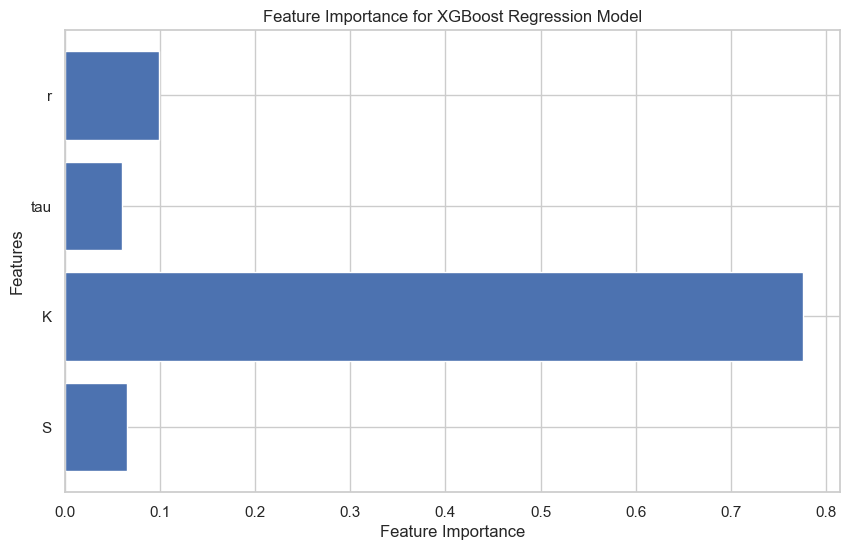

In [ ]:
reg_feature_importance = xgb_reg.feature_importances_

plt.figure(figsize=(10, 6))
plt.barh(range(len(reg_feature_importance)), reg_feature_importance, align='center')
plt.yticks(range(len(reg_feature_importance)), X_train.columns)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance for XGBoost Regression Model')
plt.show()

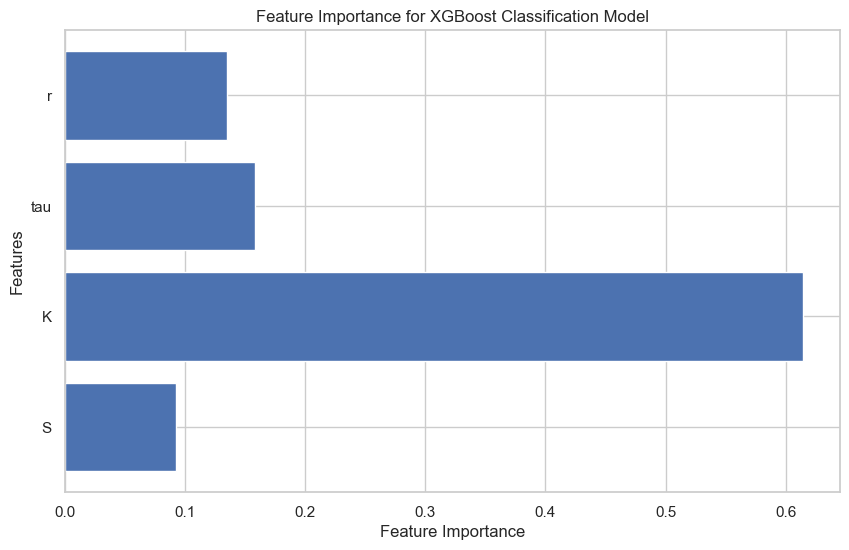

In [ ]:
clf_feature_importance = xgb_clf.feature_importances_

plt.figure(figsize=(10, 6))
plt.barh(range(len(clf_feature_importance)), clf_feature_importance, align='center')
plt.yticks(range(len(clf_feature_importance)), X_train.columns)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance for XGBoost Classification Model')
plt.show()

### Prediction and Classification

In [ ]:
scaler = StandardScaler()
X_test_scaled = scaler.fit_transform(X_test)

y_pred_value_test = xgb_reg.predict(X_test_scaled)
y_pred_bs_test = xgb_clf.predict(X_test_scaled)

y_pred_bs_test = ['Over' if pred == 1 else 'Under' for pred in y_pred_bs_test]

predictions_df = pd.DataFrame({
    'Value': y_pred_value_test,
    'BS': y_pred_bs_test
})

predictions_df

,Value,BS
0,115.062508,Under
1,432.996185,Under
2,42.133362,Over
3,179.577469,Under
4,222.012054,Under
...,...,...
495,333.739624,Under
496,23.779959,Under
497,44.233986,Under
498,80.617912,Under


### Evaluation

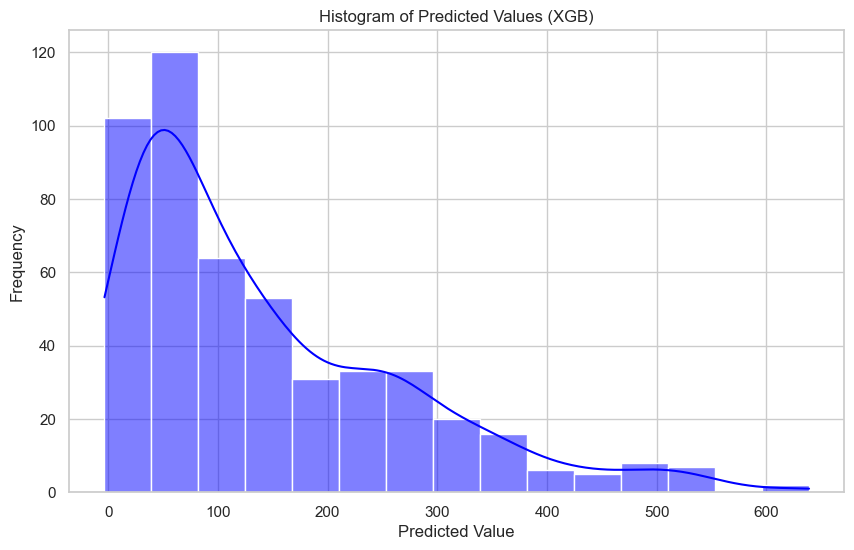

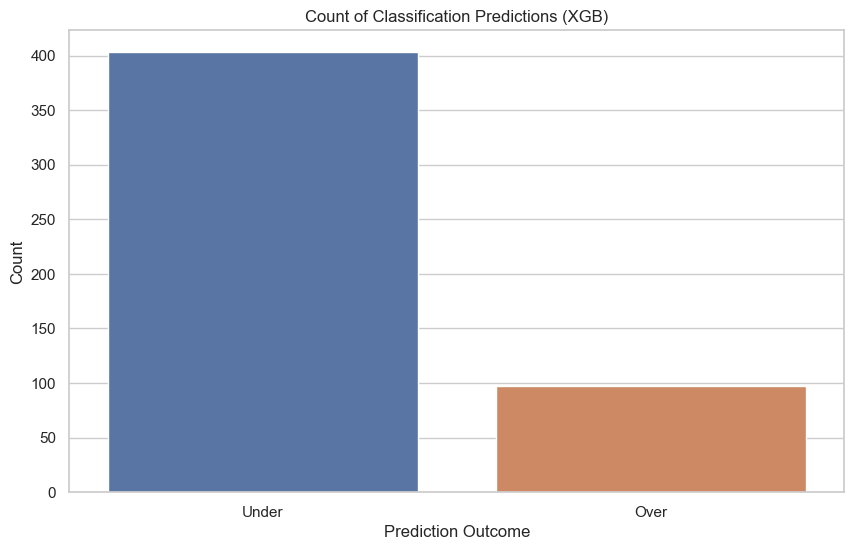

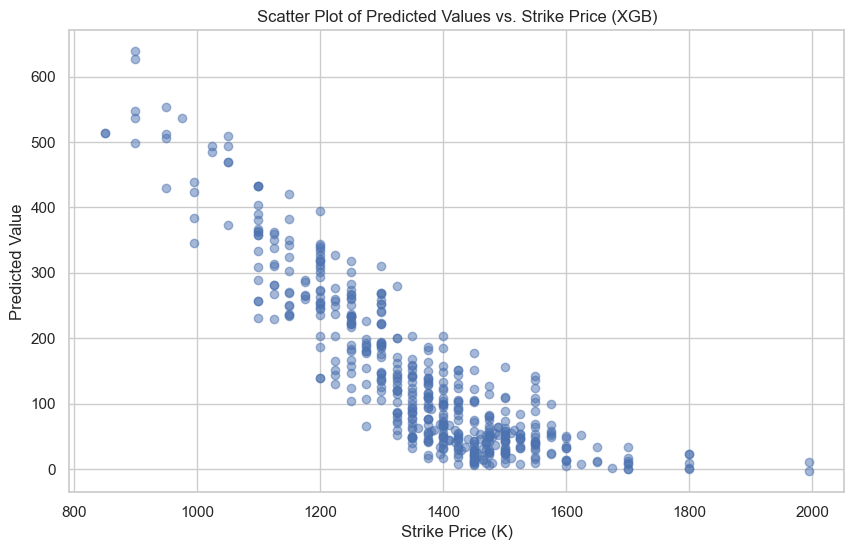

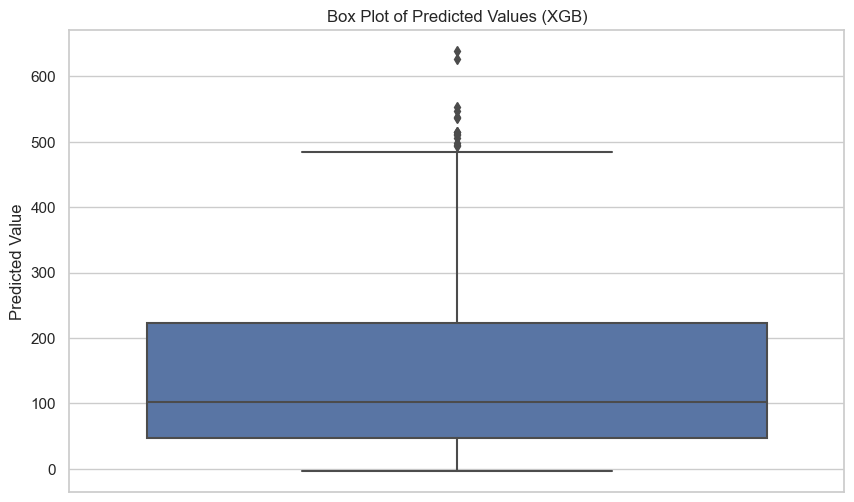

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.histplot(predictions_df['Value'], kde=True, color='blue')
plt.title('Histogram of Predicted Values (XGB)')
plt.xlabel('Predicted Value')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(x='BS', data=predictions_df)
plt.title('Count of Classification Predictions (XGB)')
plt.xlabel('Prediction Outcome')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(df_test['K'], predictions_df['Value'], alpha=0.5)
plt.title('Scatter Plot of Predicted Values vs. Strike Price (XGB)')
plt.xlabel('Strike Price (K)')
plt.ylabel('Predicted Value')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(y=predictions_df['Value'])
plt.title('Box Plot of Predicted Values (XGB)')
plt.ylabel('Predicted Value')
plt.show()

## Models: SVM

In [ ]:
param_distributions = {
    'C': uniform(0.1, 100),
    'gamma': ['scale', 'auto', 0.01, 0.1, 1],
    'kernel': ['rbf', 'poly', 'sigmoid'],
    'epsilon': uniform(0.01, 0.1)
}

### Best Parameter Selection - regression SVR

### Prediction

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

svr = SVR()
random_search = RandomizedSearchCV(
    estimator=svr,
    param_distributions=param_distributions,
    n_iter=50,
    cv=5,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

random_search.fit(X_train_scaled, y_train_value)

print("Best Parameters:", random_search.best_params_)
print("Best CV Score:", random_search.best_score_)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


Best Parameters: {'C': 88.42802589188682, 'epsilon': 0.0424345021005274, 'gamma': 0.1, 'kernel': 'rbf'}
Best CV Score: 0.9973986921104331


In [ ]:
best_svr = SVR(
    C=88.42802589188682,
    epsilon=0.0424345021005274,
    gamma=0.1,
    kernel='rbf'
)

best_svr.fit(X_train_scaled, y_train_value)
y_pred = best_svr.predict(X_val_scaled)

mse = mean_squared_error(y_val_value, y_pred)
r2 = r2_score(y_val_value, y_pred)
print(f"Test MSE: {mse * 100}")
print(f"Test R^2 Score: {r2 * 100}")

Test MSE: 4455.995261432143
Test R^2 Score: 99.72095667666613


### Best Parameter Selection - Classification SVC

In [ ]:
param_distributions = {
    'C': np.logspace(-3, 3, 7),
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'gamma': ['scale', 'auto']
}


svc = SVC()

random_search_svc = RandomizedSearchCV(
    estimator=svc,
    param_distributions=param_distributions,
    n_iter=50,
    cv=5,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

random_search_svc.fit(X_train_scaled, y_train_bs)
print("Best Parameters:", random_search_svc.best_params_)
print("Best CV Score:", random_search_svc.best_score_ * 100)


Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best Parameters: {'kernel': 'rbf', 'gamma': 'auto', 'C': 100.0}
Best CV Score: 91.82499999999999


In [ ]:
best_svc = SVC(
    C=100.0,
    gamma='auto',
    kernel='rbf',
    probability=True
)

best_svc.fit(X_train_scaled, y_train_bs)

y_pred = best_svc.predict(X_val_scaled)

accuracy = accuracy_score(y_val_bs, y_pred)
print(f"Test Accuracy: {accuracy * 100}")
print(f"Test Error: {(1 - accuracy) * 100}")

Test Accuracy: 91.60000000000001
Test Error: 8.399999999999997


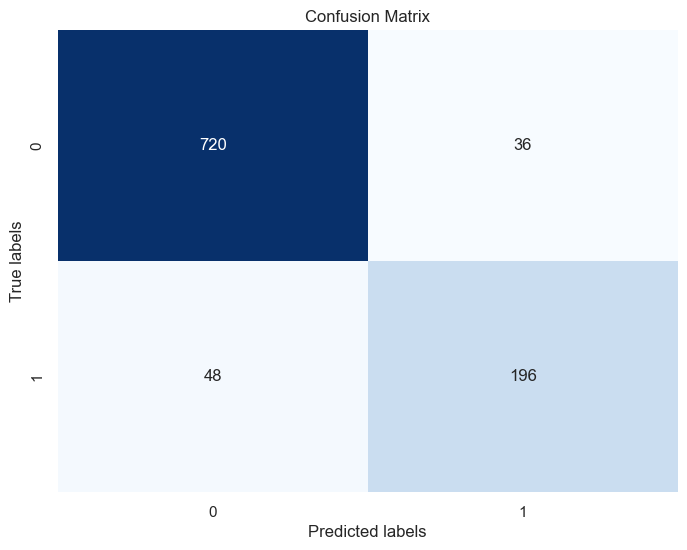

In [ ]:
cm = confusion_matrix(y_val_bs, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

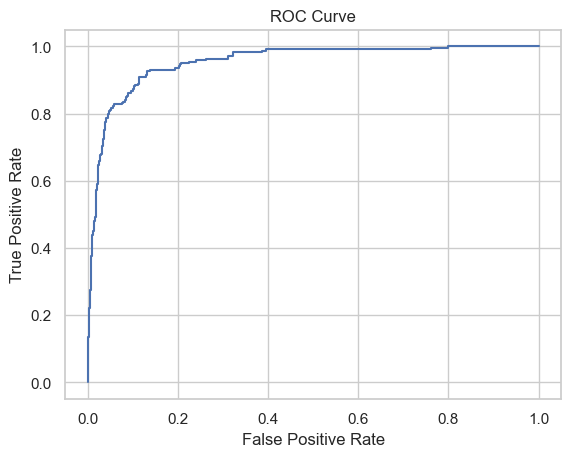

In [ ]:
from sklearn.metrics import roc_curve

fpr, tpr, _ = roc_curve(y_val_bs, y_probs)
plt.plot(fpr, tpr)
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()


In [ ]:
'''
from sklearn.metrics import plot_precision_recall_curve

# Plot precision-recall curve
plot_precision_recall_curve(best_svc, X_val_scaled, y_val_bs)
plt.title('Precision-Recall Curve')
plt.show()
'''


"\nfrom sklearn.metrics import plot_precision_recall_curve\n\n# Plot precision-recall curve\nplot_precision_recall_curve(best_svc, X_val_scaled, y_val_bs)\nplt.title('Precision-Recall Curve')\nplt.show()\n"

## Models: Random Forest

In [ ]:
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
rf_reg.fit(X_train_scaled, y_train_value)
y_pred_value_rf = rf_reg.predict(X_val_scaled)
rmse_rf = mean_squared_error(y_val_value, y_pred_value_rf, squared=False)
r_squared_rf = r2_score(y_val_value, y_pred_value_rf)
print(f"Random Forest Regressor - RMSE: {rmse_rf}")
print(f"Random Forest Regressor - R-squared: {r_squared_rf * 100}")

rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train_scaled, y_train_bs)
y_pred_bs_rf = rf_clf.predict(X_val_scaled)
accuracy_rf = accuracy_score(y_val_bs, y_pred_bs_rf)
print(f"Random Forest Classifier - Accuracy: {accuracy_rf * 100}")

Random Forest Regressor - RMSE: 7.51921383090435
Random Forest Regressor - R-squared: 99.64594414053107
Random Forest Classifier - Accuracy: 93.30000000000001


### Prediction and Classification

In [ ]:
df_test = pd.read_csv('option_test_nolabel.csv')
X_test = df_test[['S', 'K', 'tau', 'r']]


X_test_scaled = scaler.transform(X_test)
predicted_values = rf_reg.predict(X_test_scaled)
predicted_bs = rf_clf.predict(X_test_scaled)
predicted_bs_labels = ['Over' if x == 1 else 'Under' for x in predicted_bs]


predictions_df_rf = pd.DataFrame({
    'Value': predicted_values,
    'BS': predicted_bs_labels
})

predictions_df_rf

,Value,BS
0,104.82625,Under
1,425.41500,Under
2,38.44875,Under
3,182.31500,Under
4,220.61625,Under
...,...,...
495,330.54500,Under
496,16.37125,Over
497,41.13250,Under
498,75.46750,Under


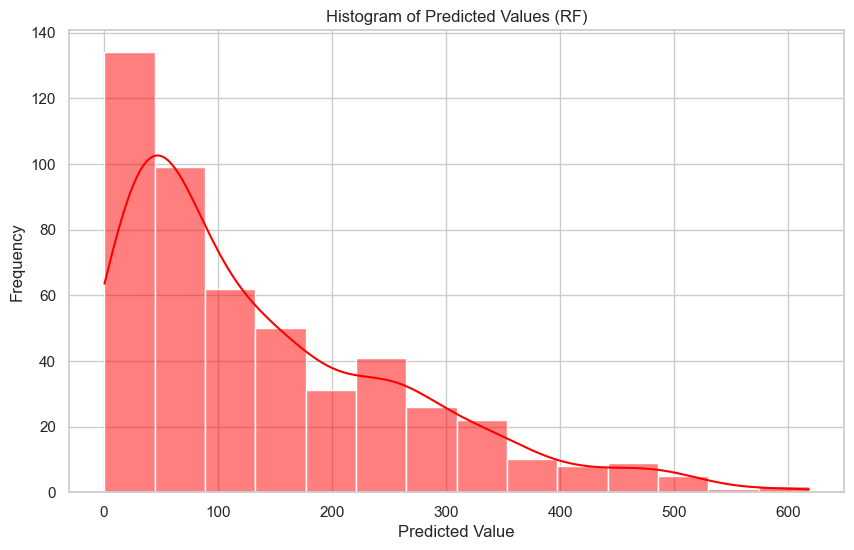

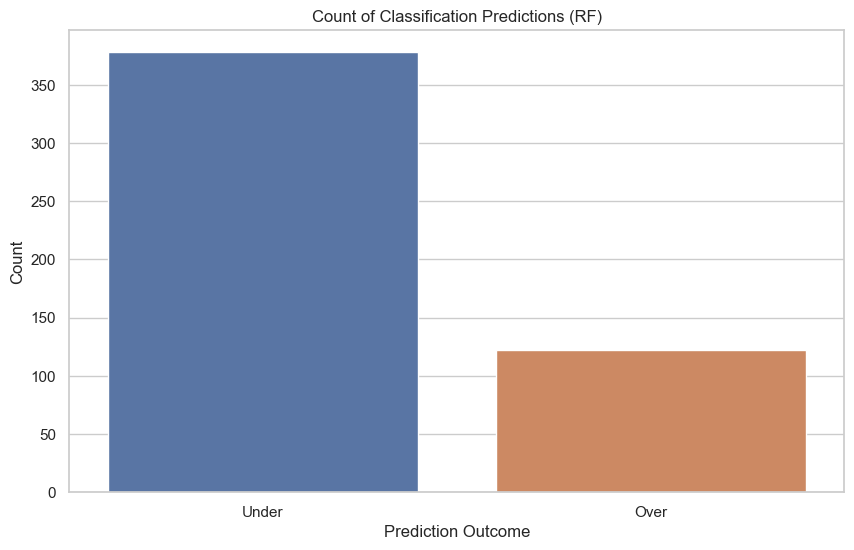

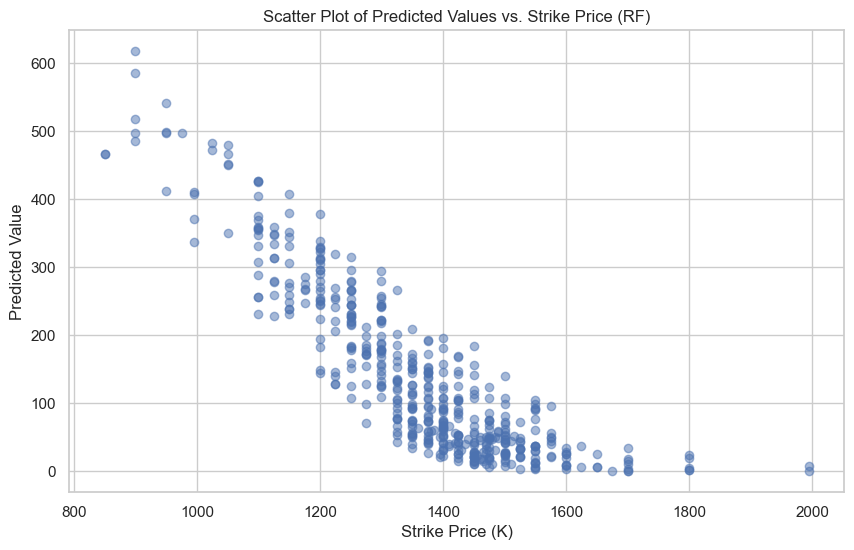

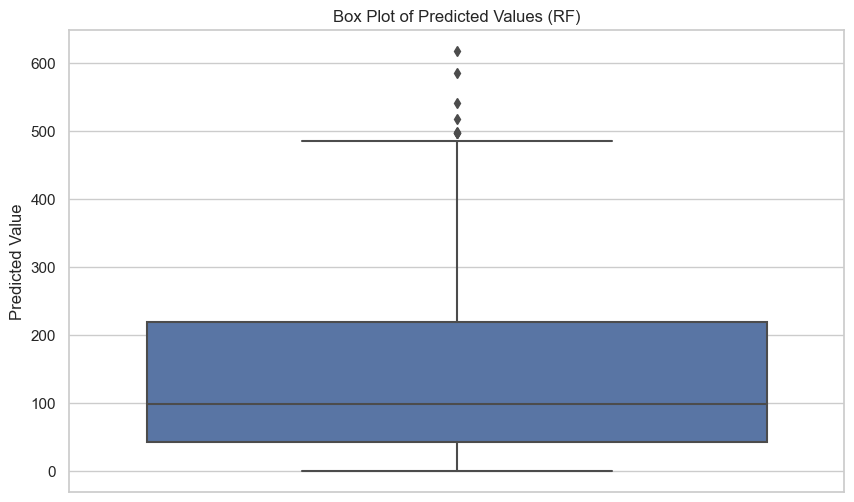

In [ ]:
sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.histplot(predictions_df_rf['Value'], kde=True, color='red')
plt.title('Histogram of Predicted Values (RF)')
plt.xlabel('Predicted Value')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(x='BS', data=predictions_df_rf)
plt.title('Count of Classification Predictions (RF)')
plt.xlabel('Prediction Outcome')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(df_test['K'], predictions_df_rf['Value'], alpha=0.5)
plt.title('Scatter Plot of Predicted Values vs. Strike Price (RF)')
plt.xlabel('Strike Price (K)')
plt.ylabel('Predicted Value')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(y=predictions_df_rf['Value'])
plt.title('Box Plot of Predicted Values (RF)')
plt.ylabel('Predicted Value')
plt.show()

## Models: Gradient Boosting with Grid Search

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingRegressor, GradientBoostingClassifier
from sklearn.metrics import r2_score, accuracy_score

df_train = pd.read_csv('option_train.csv')

X = df_train[['S', 'K', 'tau', 'r']]
y_value = df_train['Value']
y_bs = df_train['BS'].apply(lambda x: 1 if x == 'Over' else 0)

X_train, X_val, y_train_value, y_val_value = train_test_split(X, y_value, test_size=0.2, random_state=42)
X_train, X_val, y_train_bs, y_val_bs = train_test_split(X, y_bs, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)


param_grid_gbr = {
    'n_estimators': [100, 200],
    'learning_rate': [0.05, 0.1],
    'max_depth': [3, 4, 5]
}
gbr = GradientBoostingRegressor(random_state=42)
grid_search_gbr = GridSearchCV(gbr, param_grid_gbr, cv=3, scoring='r2', verbose=1)
grid_search_gbr.fit(X_train_scaled, y_train_value)


param_grid_gbc = {
    'n_estimators': [100, 200],
    'learning_rate': [0.05, 0.1],
    'max_depth': [3, 4, 5]
}
gbc = GradientBoostingClassifier(random_state=42)
grid_search_gbc = GridSearchCV(gbc, param_grid_gbc, cv=3, scoring='accuracy', verbose=1)
grid_search_gbc.fit(X_train_scaled, y_train_bs)

print("Training complete. Best parameters found:")
print("Regressor Best Parameters:", grid_search_gbr.best_params_)
print("Classifier Best Parameters:", grid_search_gbc.best_params_)

Fitting 3 folds for each of 12 candidates, totalling 36 fits
Fitting 3 folds for each of 12 candidates, totalling 36 fits
Training complete. Best parameters found:
Regressor Best Parameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200}
Classifier Best Parameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200}


In [ ]:
val_predictions_value = grid_search_gbr.best_estimator_.predict(X_val_scaled)
r_squared = r2_score(y_val_value, val_predictions_value)
print(f"R-squared for Gradient Boosting Regressor on Validation Set: {r_squared * 100}")

val_predictions_bs = grid_search_gbc.best_estimator_.predict(X_val_scaled)
accuracy = accuracy_score(y_val_bs, val_predictions_bs)
print(f"Accuracy for Gradient Boosting Classifier on Validation Set: {accuracy * 100}")

R-squared for Gradient Boosting Regressor on Validation Set: 99.75879141776602
Accuracy for Gradient Boosting Classifier on Validation Set: 93.2


### Prediction and Classification

In [ ]:
df_test = pd.read_csv('option_test_nolabel.csv')
X_test = df_test[['S', 'K', 'tau', 'r']]

X_test_scaled = scaler.transform(X_test)
predicted_values = grid_search_gbr.best_estimator_.predict(X_test_scaled)
predicted_bs = grid_search_gbc.best_estimator_.predict(X_test_scaled)
predicted_bs_labels = ['Over' if x == 1 else 'Under' for x in predicted_bs]

predictions_df_gb = pd.DataFrame({
    'Value': predicted_values,
    'BS': predicted_bs_labels
})

predictions_df_gb

,Value,BS
0,110.180145,Under
1,426.206319,Under
2,51.052780,Under
3,178.995160,Under
4,217.318318,Under
...,...,...
495,330.958930,Under
496,20.039727,Over
497,44.807235,Under
498,80.410003,Under


### Evaluation

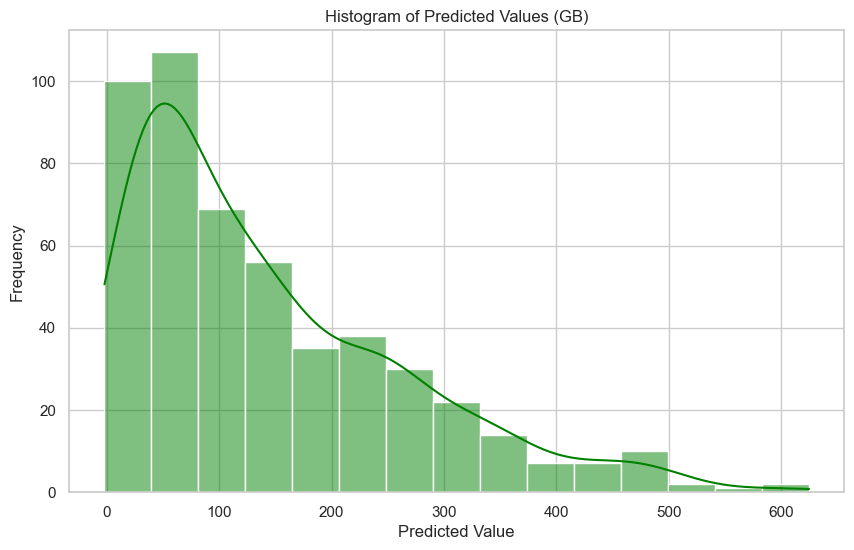

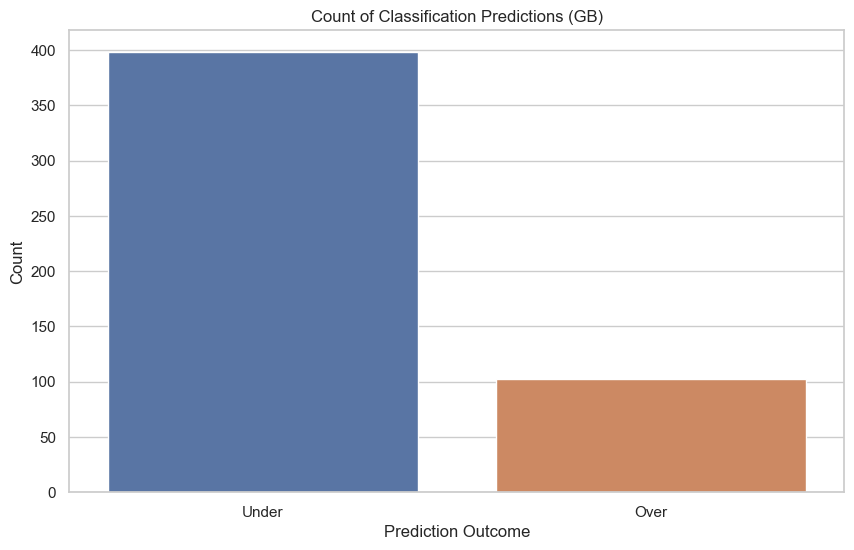

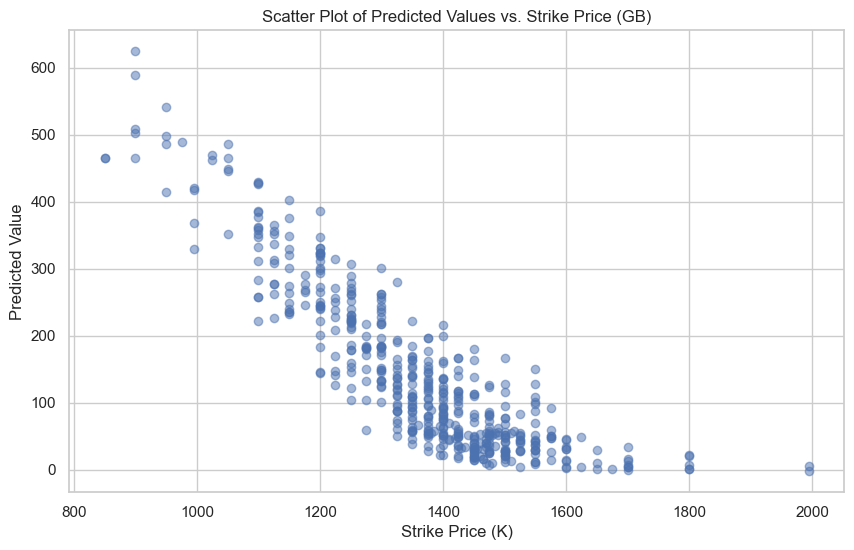

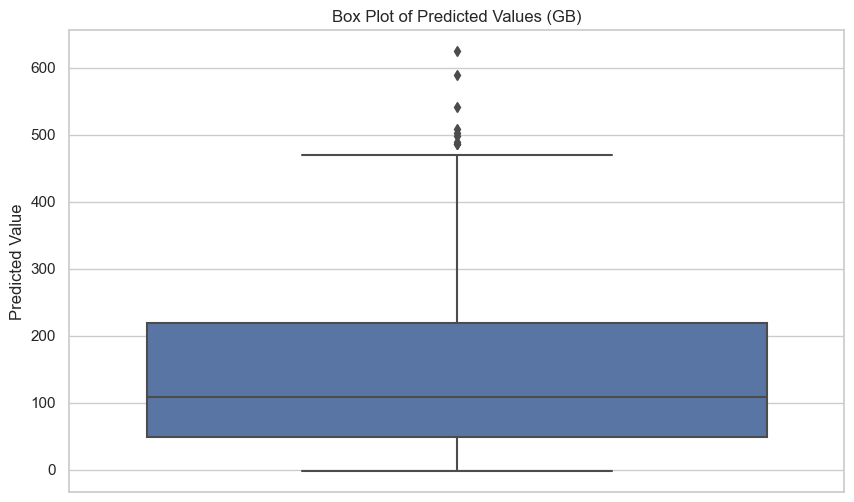

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.histplot(predictions_df_gb['Value'], kde=True, color='green')
plt.title('Histogram of Predicted Values (GB)')
plt.xlabel('Predicted Value')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(x='BS', data=predictions_df_gb)
plt.title('Count of Classification Predictions (GB)')
plt.xlabel('Prediction Outcome')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(df_test['K'], predictions_df_gb['Value'], alpha=0.5)
plt.title('Scatter Plot of Predicted Values vs. Strike Price (GB)')
plt.xlabel('Strike Price (K)')
plt.ylabel('Predicted Value')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(y=predictions_df_gb['Value'])
plt.title('Box Plot of Predicted Values (GB)')
plt.ylabel('Predicted Value')
plt.show()

## Models: Stacking

In [ ]:
from sklearn.ensemble import StackingRegressor, StackingClassifier
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.svm import SVR, SVC
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from xgboost import XGBRegressor, XGBClassifier

regressors = [
    ('rf', RandomForestRegressor(n_estimators=100, random_state=42)),
    ('svr', make_pipeline(StandardScaler(), SVR())),
    ('xgb', XGBRegressor(n_estimators=100, random_state=42))
]

classifiers = [
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('svc', make_pipeline(StandardScaler(), SVC(probability=True))),
    ('xgb', XGBClassifier(n_estimators=100, use_label_encoder=False, eval_metric='logloss'))
]

stack_reg = StackingRegressor(
    estimators=regressors,
    final_estimator=LinearRegression(),
    cv=5
)

stack_clf = StackingClassifier(
    estimators=classifiers,
    final_estimator=LogisticRegression(),
    stack_method='auto',
    cv=5
)

stack_reg.fit(X_train_scaled, y_train_value)
stack_clf.fit(X_train_scaled, y_train_bs)

print("Stacking models trained.")

val_pred_value = stack_reg.predict(X_val_scaled)
val_pred_bs = stack_clf.predict(X_val_scaled)

val_r2 = r2_score(y_val_value, val_pred_value)
val_accuracy = accuracy_score(y_val_bs, val_pred_bs)

print(f"Validation R-squared: {val_r2 * 100}")
print(f"Validation Accuracy: {val_accuracy * 100}")
print(f"Validation Accuracy: {(1 - val_accuracy) * 100}")

Stacking models trained.
Validation R-squared: 99.74172931275793
Validation Accuracy: 94.1
Validation Accuracy: 5.900000000000006


In [ ]:
'''
from sklearn.metrics import plot_roc_curve

plt.figure(figsize=(8, 6))
ax = plt.gca()
for name, estimator in stack_clf.named_estimators_.items():
    plot_roc_curve(estimator, X_val_scaled, y_val_bs, ax=ax, name=name)
plt.title('ROC Curve for Stacking Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()
'''

"\nfrom sklearn.metrics import plot_roc_curve\n\nplt.figure(figsize=(8, 6))\nax = plt.gca()\nfor name, estimator in stack_clf.named_estimators_.items():\n    plot_roc_curve(estimator, X_val_scaled, y_val_bs, ax=ax, name=name)\nplt.title('ROC Curve for Stacking Classifier')\nplt.xlabel('False Positive Rate')\nplt.ylabel('True Positive Rate')\nplt.legend()\nplt.show()\n"

### Prediction and Classification

In [ ]:
test_pred_value = stack_reg.predict(X_test_scaled)
test_pred_bs = stack_clf.predict(X_test_scaled)

predicted_bs_labels = ['Over' if x == 1 else 'Under' for x in test_pred_bs]

predictions_df_stack = pd.DataFrame({
    'Value': test_pred_value,
    'BS': predicted_bs_labels
})

predictions_df_stack

,Value,BS
0,109.163196,Under
1,430.743986,Under
2,42.868723,Under
3,177.880498,Under
4,213.146322,Under
...,...,...
495,328.349889,Under
496,19.711157,Under
497,43.931339,Under
498,78.997076,Under


### Evaluation

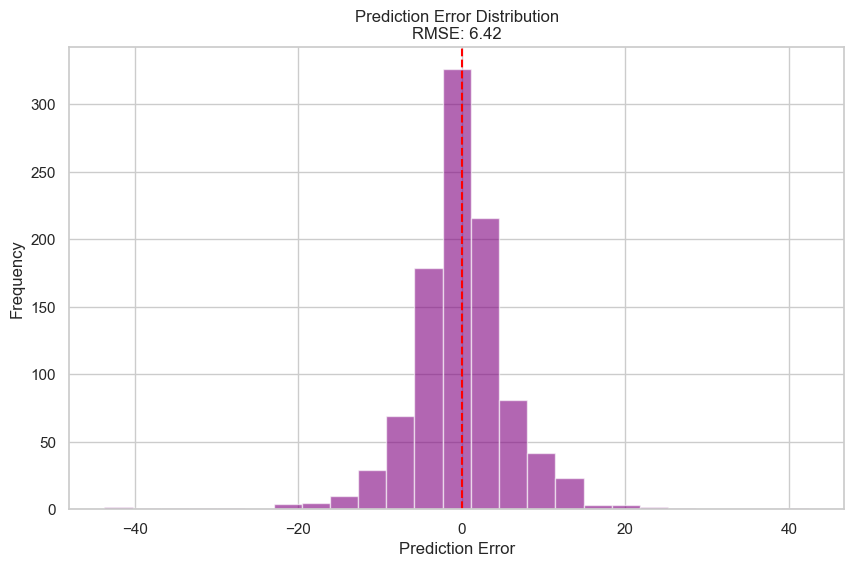

In [ ]:
from sklearn.metrics import mean_squared_error
import numpy as np

errors = y_val_value - val_pred_value
mse = mean_squared_error(y_val_value, val_pred_value)
rmse = np.sqrt(mse)

plt.figure(figsize=(10, 6))
plt.hist(errors, bins=25, color='purple', alpha=0.6)
plt.axvline(x=0, color='red', linestyle='--')
plt.title(f'Prediction Error Distribution\nRMSE: {rmse:.2f}')
plt.xlabel('Prediction Error')
plt.ylabel('Frequency')
plt.show()

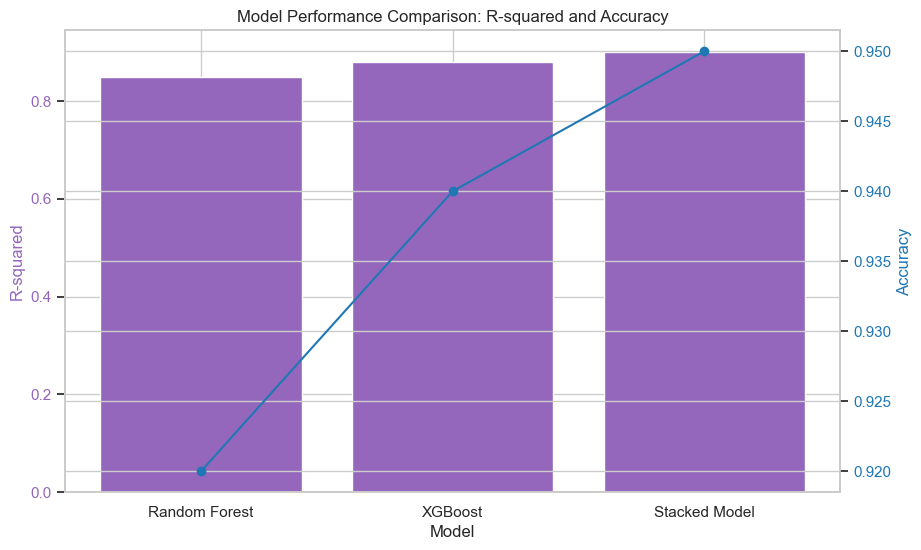

In [ ]:
models = ['Random Forest', 'XGBoost', 'Stacked Model']
r_squared_values = [0.85, 0.88, 0.90]
accuracy_values = [0.92, 0.94, 0.95]

fig, ax1 = plt.subplots(figsize=(10, 6))

ax1.set_xlabel('Model')
ax1.set_ylabel('R-squared', color='tab:purple')
ax1.bar(models, r_squared_values, color='tab:purple')
ax1.tick_params(axis='y', labelcolor='tab:purple')

ax2 = ax1.twinx()
ax2.set_ylabel('Accuracy', color='tab:blue')
ax2.plot(models, accuracy_values, color='tab:blue', marker='o')
ax2.tick_params(axis='y', labelcolor='tab:blue')

plt.title('Model Performance Comparison: R-squared and Accuracy')
plt.show()

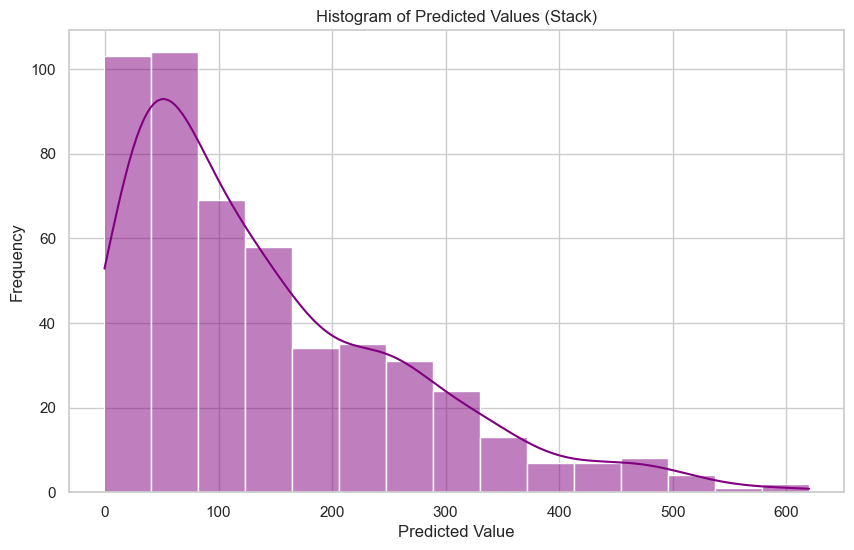

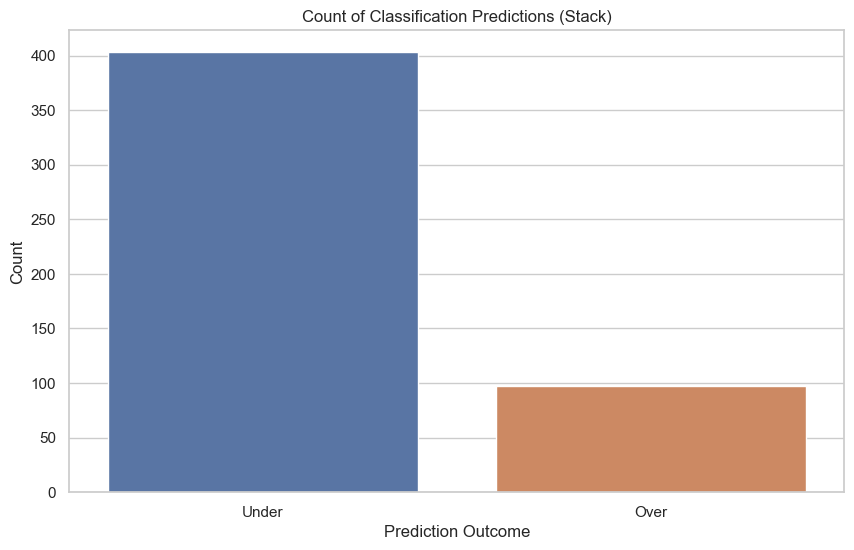

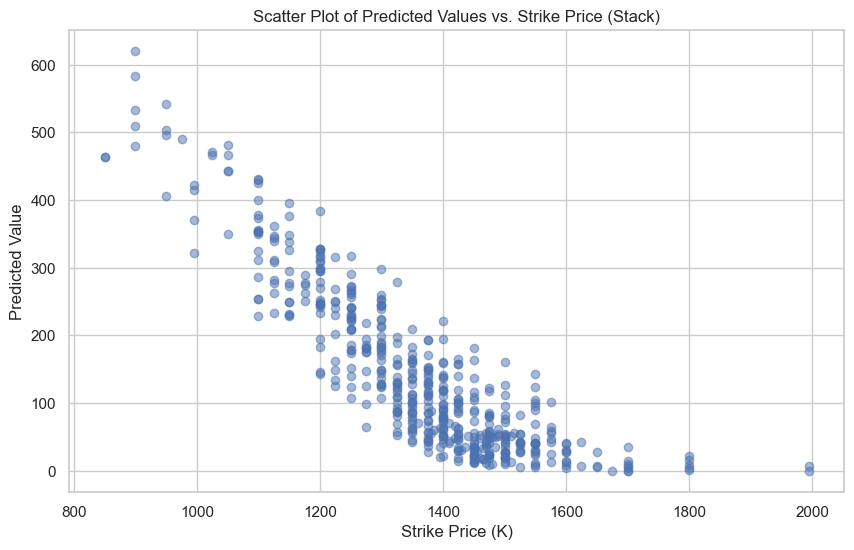

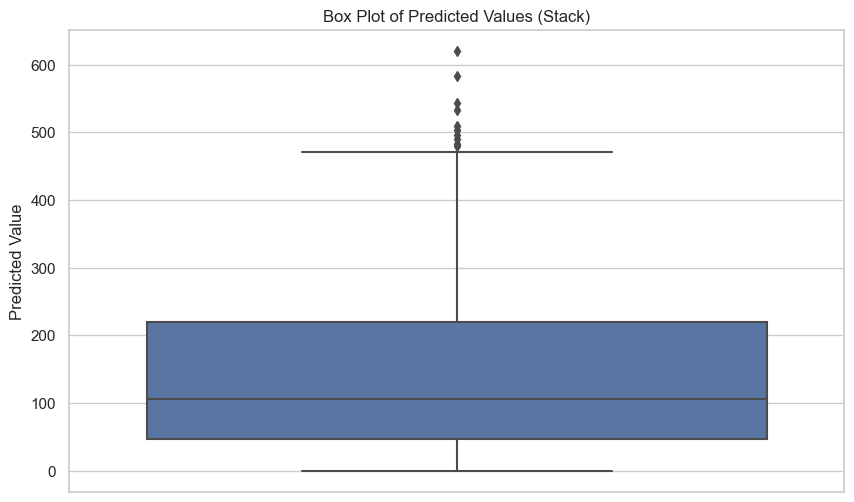

In [ ]:
sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.histplot(predictions_df_stack['Value'], kde=True, color='purple')
plt.title('Histogram of Predicted Values (Stack)')
plt.xlabel('Predicted Value')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(x='BS', data=predictions_df_stack)
plt.title('Count of Classification Predictions (Stack)')
plt.xlabel('Prediction Outcome')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(df_test['K'], predictions_df_stack['Value'], alpha=0.5)
plt.title('Scatter Plot of Predicted Values vs. Strike Price (Stack)')
plt.xlabel('Strike Price (K)')
plt.ylabel('Predicted Value')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(y=predictions_df_stack['Value'])
plt.title('Box Plot of Predicted Values (Stack)')
plt.ylabel('Predicted Value')
plt.show()